In [ ]:
# Lets import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import the dataset
data=pd.read_excel('Healthcare_dataset.xlsx',sheet_name='Dataset')

In [ ]:
data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [ ]:
# Check for null values
data.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [ ]:
#Lets check for datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [ ]:
cat_var= data.select_dtypes('object')
for col in cat_var:
    print(cat_var[col].unique(), cat_var[col].value_counts())
    print('......................................')

['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424'] Ptid
P1       1
P2275    1
P2277    1
P2278    1
P2279    1
        ..
P1145    1
P1146    1
P1147    1
P1148    1
P3424    1
Name: count, Length: 3424, dtype: int64
......................................
['Persistent' 'Non-Persistent'] Persistency_Flag
Non-Persistent    2135
Persistent        1289
Name: count, dtype: int64
......................................
['Male' 'Female'] Gender
Female    3230
Male       194
Name: count, dtype: int64
......................................
['Caucasian' 'Asian' 'Other/Unknown' 'African American'] Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: count, dtype: int64
......................................
['Not Hispanic' 'Hispanic' 'Unknown'] Ethnicity
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: count, dtype: int64
......................................
['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast'] Region
Midwe

In [ ]:
# lets look at the 'int' variables
num_var= data.select_dtypes('int64')
for col in num_var:
    print(num_var[col].unique(), num_var[col].value_counts())
    print('......................................')

[  0   2   7   3   5  20  13   1   6  12   4  10  25  11  18  21  15  28
  22  37  14   8   9  17  81  42  16  30  19  45  27  24  58  26  23  33
 110  36  34  88  66  32 118  48  69  38  40  68  52  50 146  44  35  39
 108  54  72  29] Dexa_Freq_During_Rx
0      2488
5       114
6       107
7        93
8        71
4        68
10       55
12       52
3        46
14       38
9        32
11       30
1        24
2        24
13       19
20       15
16       14
18       14
22       13
26       10
24       10
15        9
30        7
17        7
28        7
21        7
36        5
19        3
42        3
32        3
34        3
52        2
48        2
58        2
25        2
39        2
88        2
54        1
146       1
50        1
35        1
44        1
108       1
72        1
40        1
68        1
45        1
38        1
69        1
118       1
66        1
110       1
33        1
23        1
27        1
81        1
37        1
29        1
Name: count, dtype: int64
.....................

### Explonatory data analysis

In [ ]:
data.head(20)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
5,P6,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,N,N,N,N,N,N,N,2
6,P7,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
7,P8,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
8,P9,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,N,N,N,N,N,N,N,1
9,P10,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [ ]:
data.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

In [ ]:
data.drop('Ptid', axis=1,inplace=True)

#### Univariate data analysis

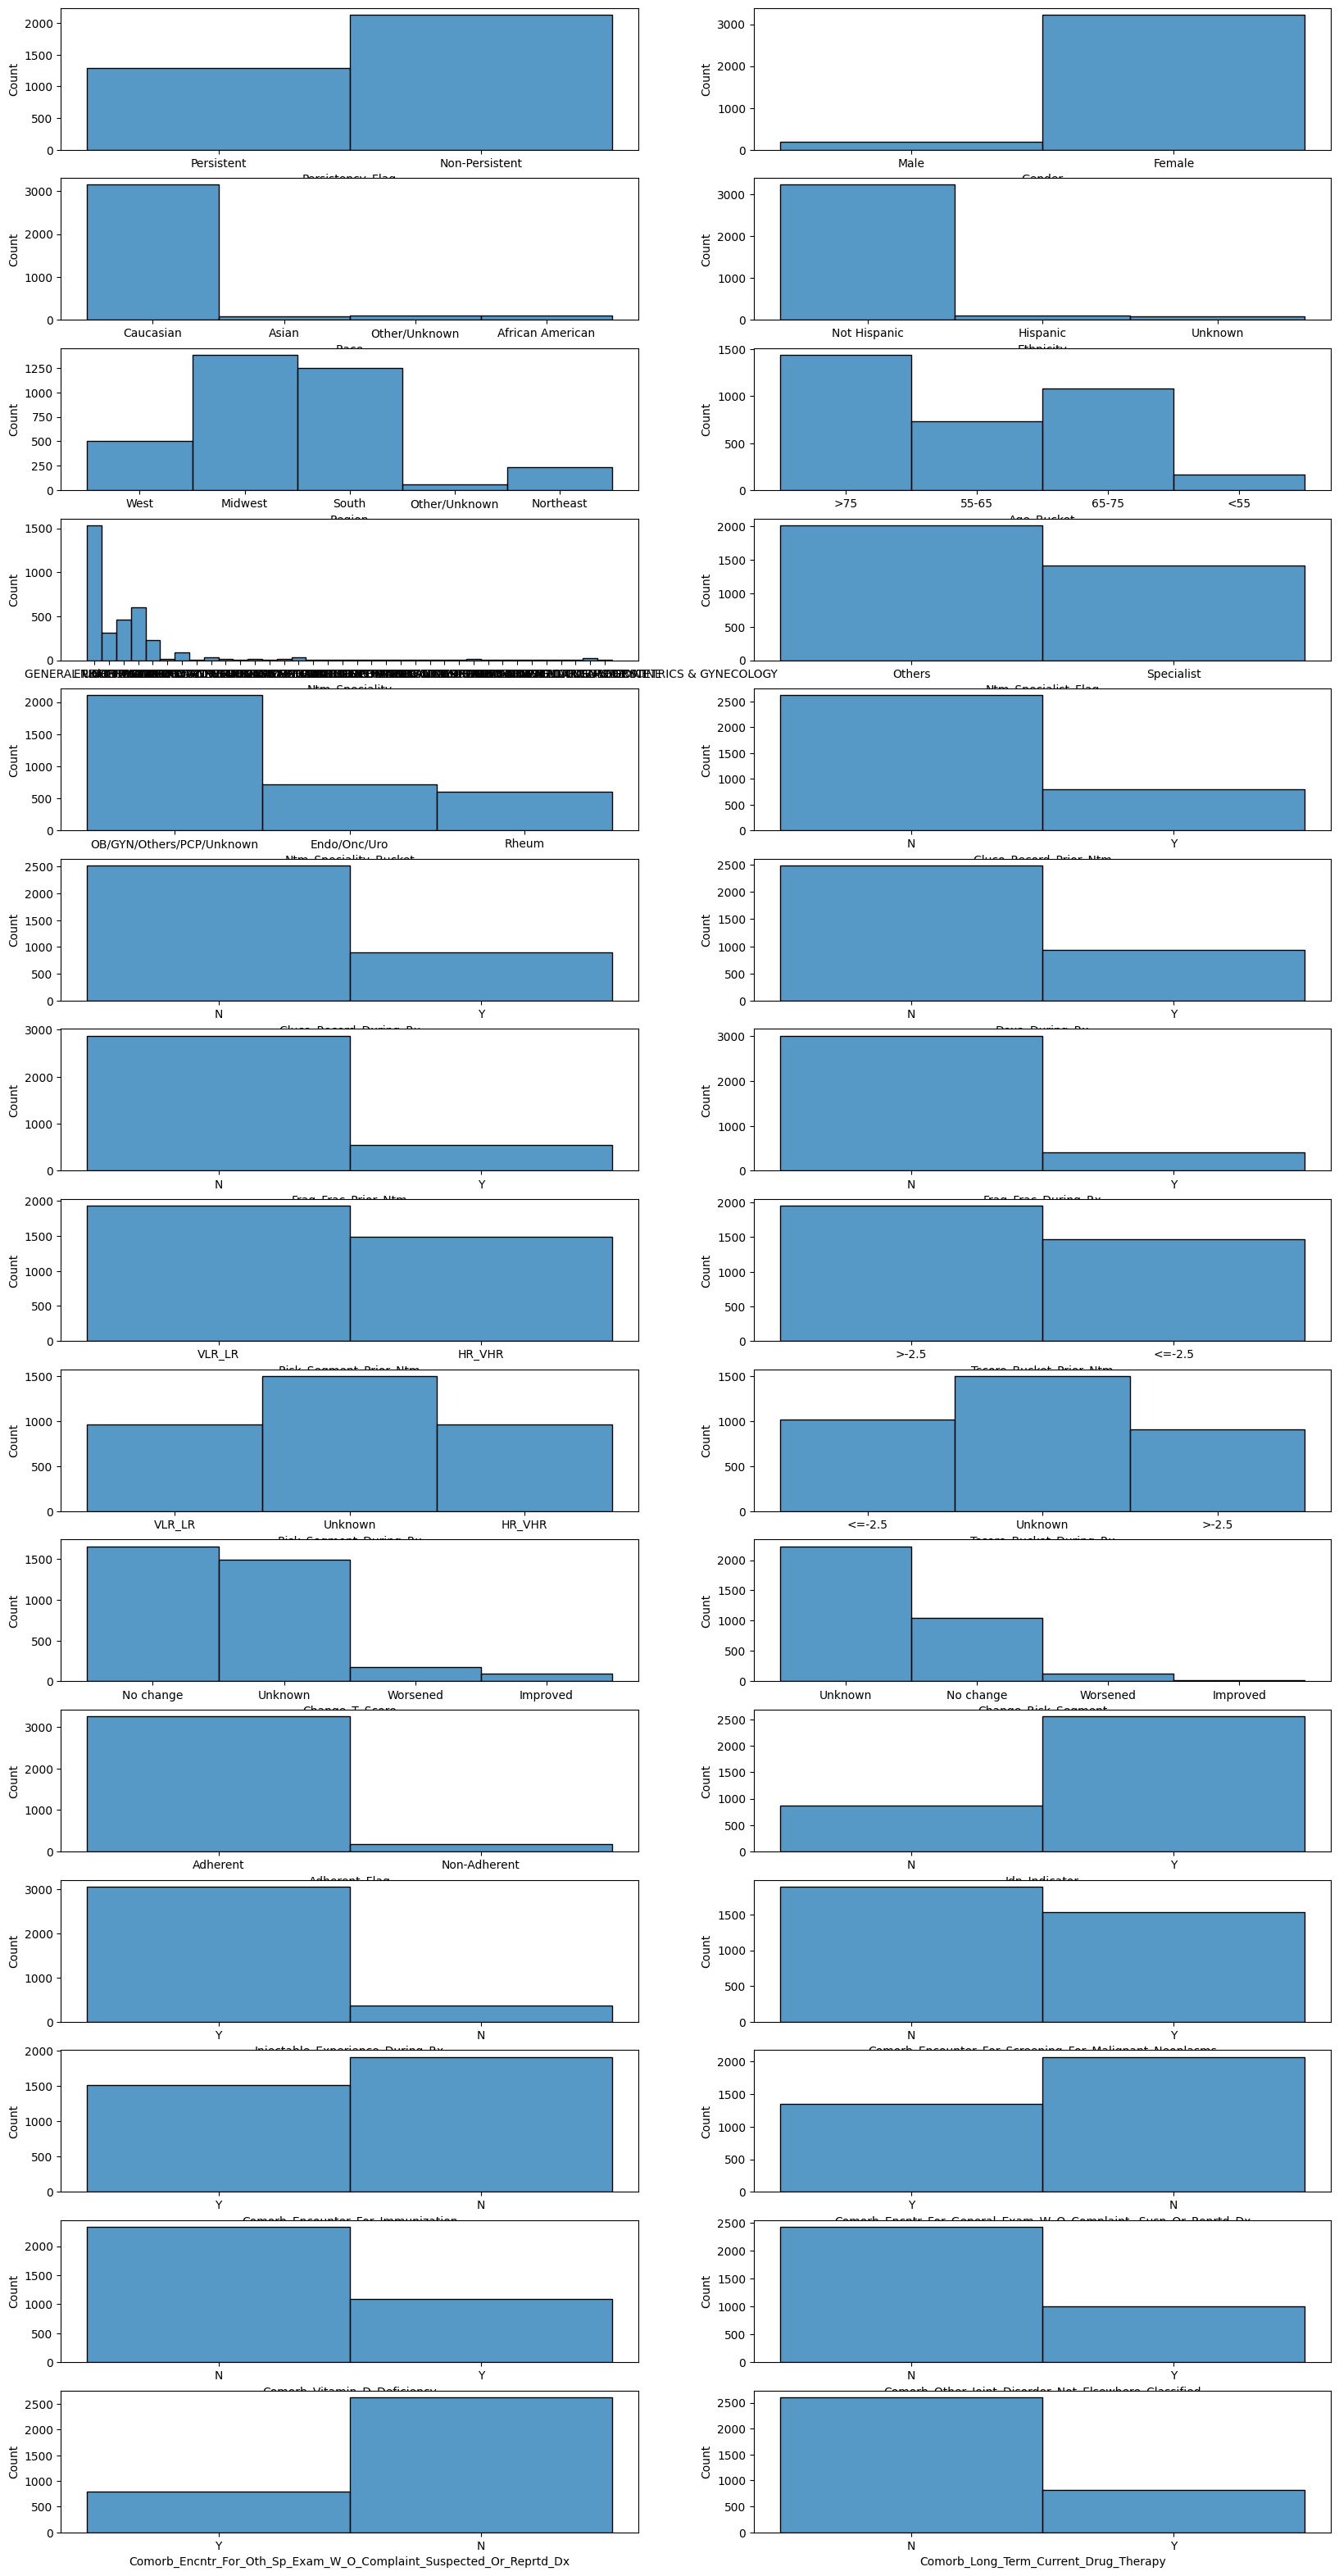

In [ ]:
cat_var=data.select_dtypes('object')
plt.figure(figsize=(20,40))
platenum=1
for i in cat_var:
    if platenum<=30:
        plt.subplot(15,2,platenum)
        sns.histplot(data=cat_var, x=i)
    platenum+=1
#plt.tight_layout()
plt.show()

* There is some bit of class imbalance in the specified columns such as gender, persistence, race
* The categorical columns are not imputed into numerical code
* The outcome variable is 'persistence'
* The variables are many, therefore we can separate risk factors, and diagnostic results apart

In [ ]:
comobidities=pd.DataFrame(data[['Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Osteoporosis_without_current_pathological_fracture',
       'Comorb_Personal_history_of_malignant_neoplasm',
       'Comorb_Gastro_esophageal_reflux_disease',
       'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
       'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain',
       'Concom_Anti_Depressants_And_Mood_Stabilisers',
       'Concom_Fluoroquinolones', 'Concom_Cephalosporins',
       'Concom_Macrolides_And_Similar_Types',
       'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General',
       'Concom_Viral_Vaccines','Persistency_Flag']])
risk_factors=pd.DataFrame(data[['Risk_Type_1_Insulin_Dependent_Diabetes',
       'Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis',
       'Risk_Untreated_Chronic_Hyperthyroidism',
       'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause',
       'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco',
       'Risk_Chronic_Malnutrition_Or_Malabsorption',
       'Risk_Chronic_Liver_Disease', 'Risk_Family_History_Of_Osteoporosis',
       'Risk_Low_Calcium_Intake', 'Risk_Vitamin_D_Insufficiency',
       'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness',
       'Risk_Hysterectomy_Oophorectomy', 'Risk_Estrogen_Deficiency',
       'Risk_Immobilization', 'Risk_Recurring_Falls']])
speciality=pd.DataFrame(data[['Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment','Persistency_Flag']])
demo_data=pd.DataFrame(data[['Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket','Persistency_Flag']])
other_data=pd.DataFrame(data[['Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx']])

In [ ]:
data.Adherent_Flag.unique()

array(['Adherent', 'Non-Adherent'], dtype=object)

In [ ]:
data.Idn_Indicator.unique()

0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Name: Count_Of_Risks, Length: 3424, dtype: bool

In [ ]:
data.Injectable_Experience_During_Rx.unique()

array(['Y', 'N'], dtype=object)

In [ ]:
# Define mappings from categories to numerical values
adherent_mapping = {'Adherent':1, 'Non-Adherent':2}
indicator_mapping = {'N': 1, 'Y': 2}
injectable_mapping = {'N': 1, 'Y': 2}


# Map categorical variables to numerical values using the defined mappings
other_data['Adherent_Flag'] = other_data['Adherent_Flag'].map(adherent_mapping)
other_data['Idn_Indicator'] = other_data['Idn_Indicator'].map(indicator_mapping)
other_data['Injectable_Experience_During_Rx'] = other_data['Injectable_Experience_During_Rx'].map(injectable_mapping)


In [1]:
speciality.describe(include='object')

NameError: name 'speciality' is not defined

#### Lets start with demographic data variables

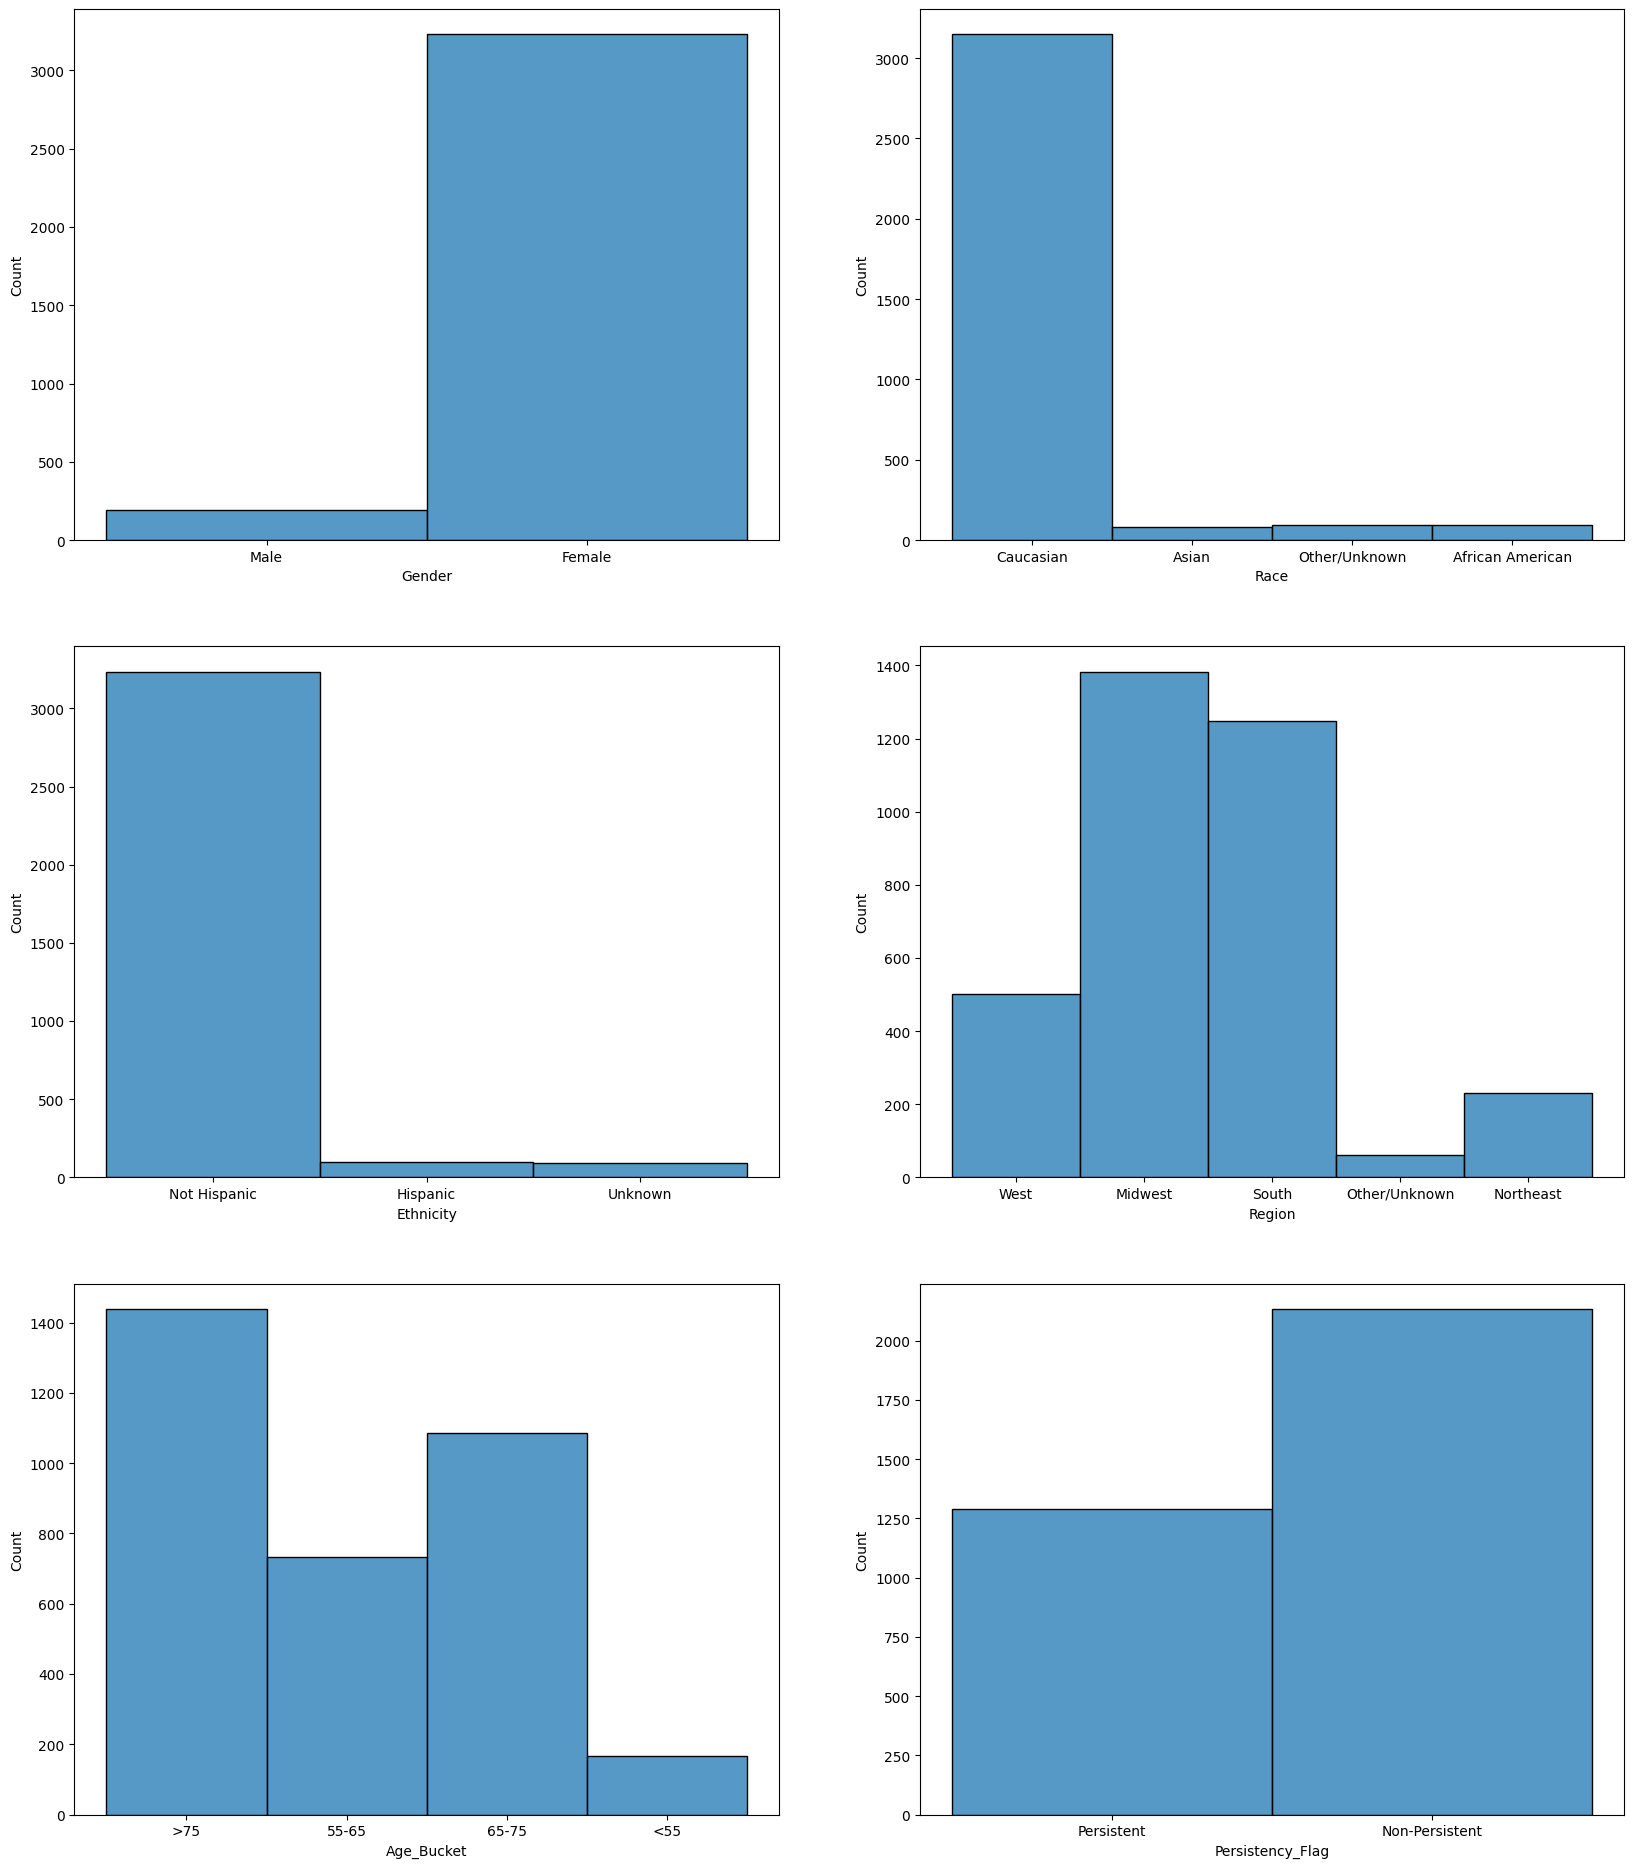

In [ ]:
cat_var=demo_data.select_dtypes('object')
plt.figure(figsize=(20,40))
platenum=1
for i in cat_var:
    if platenum<=10:
        plt.subplot(5,2,platenum)
        sns.histplot(data=cat_var, x=i)
    platenum+=1
#plt.tight_layout()
plt.show()

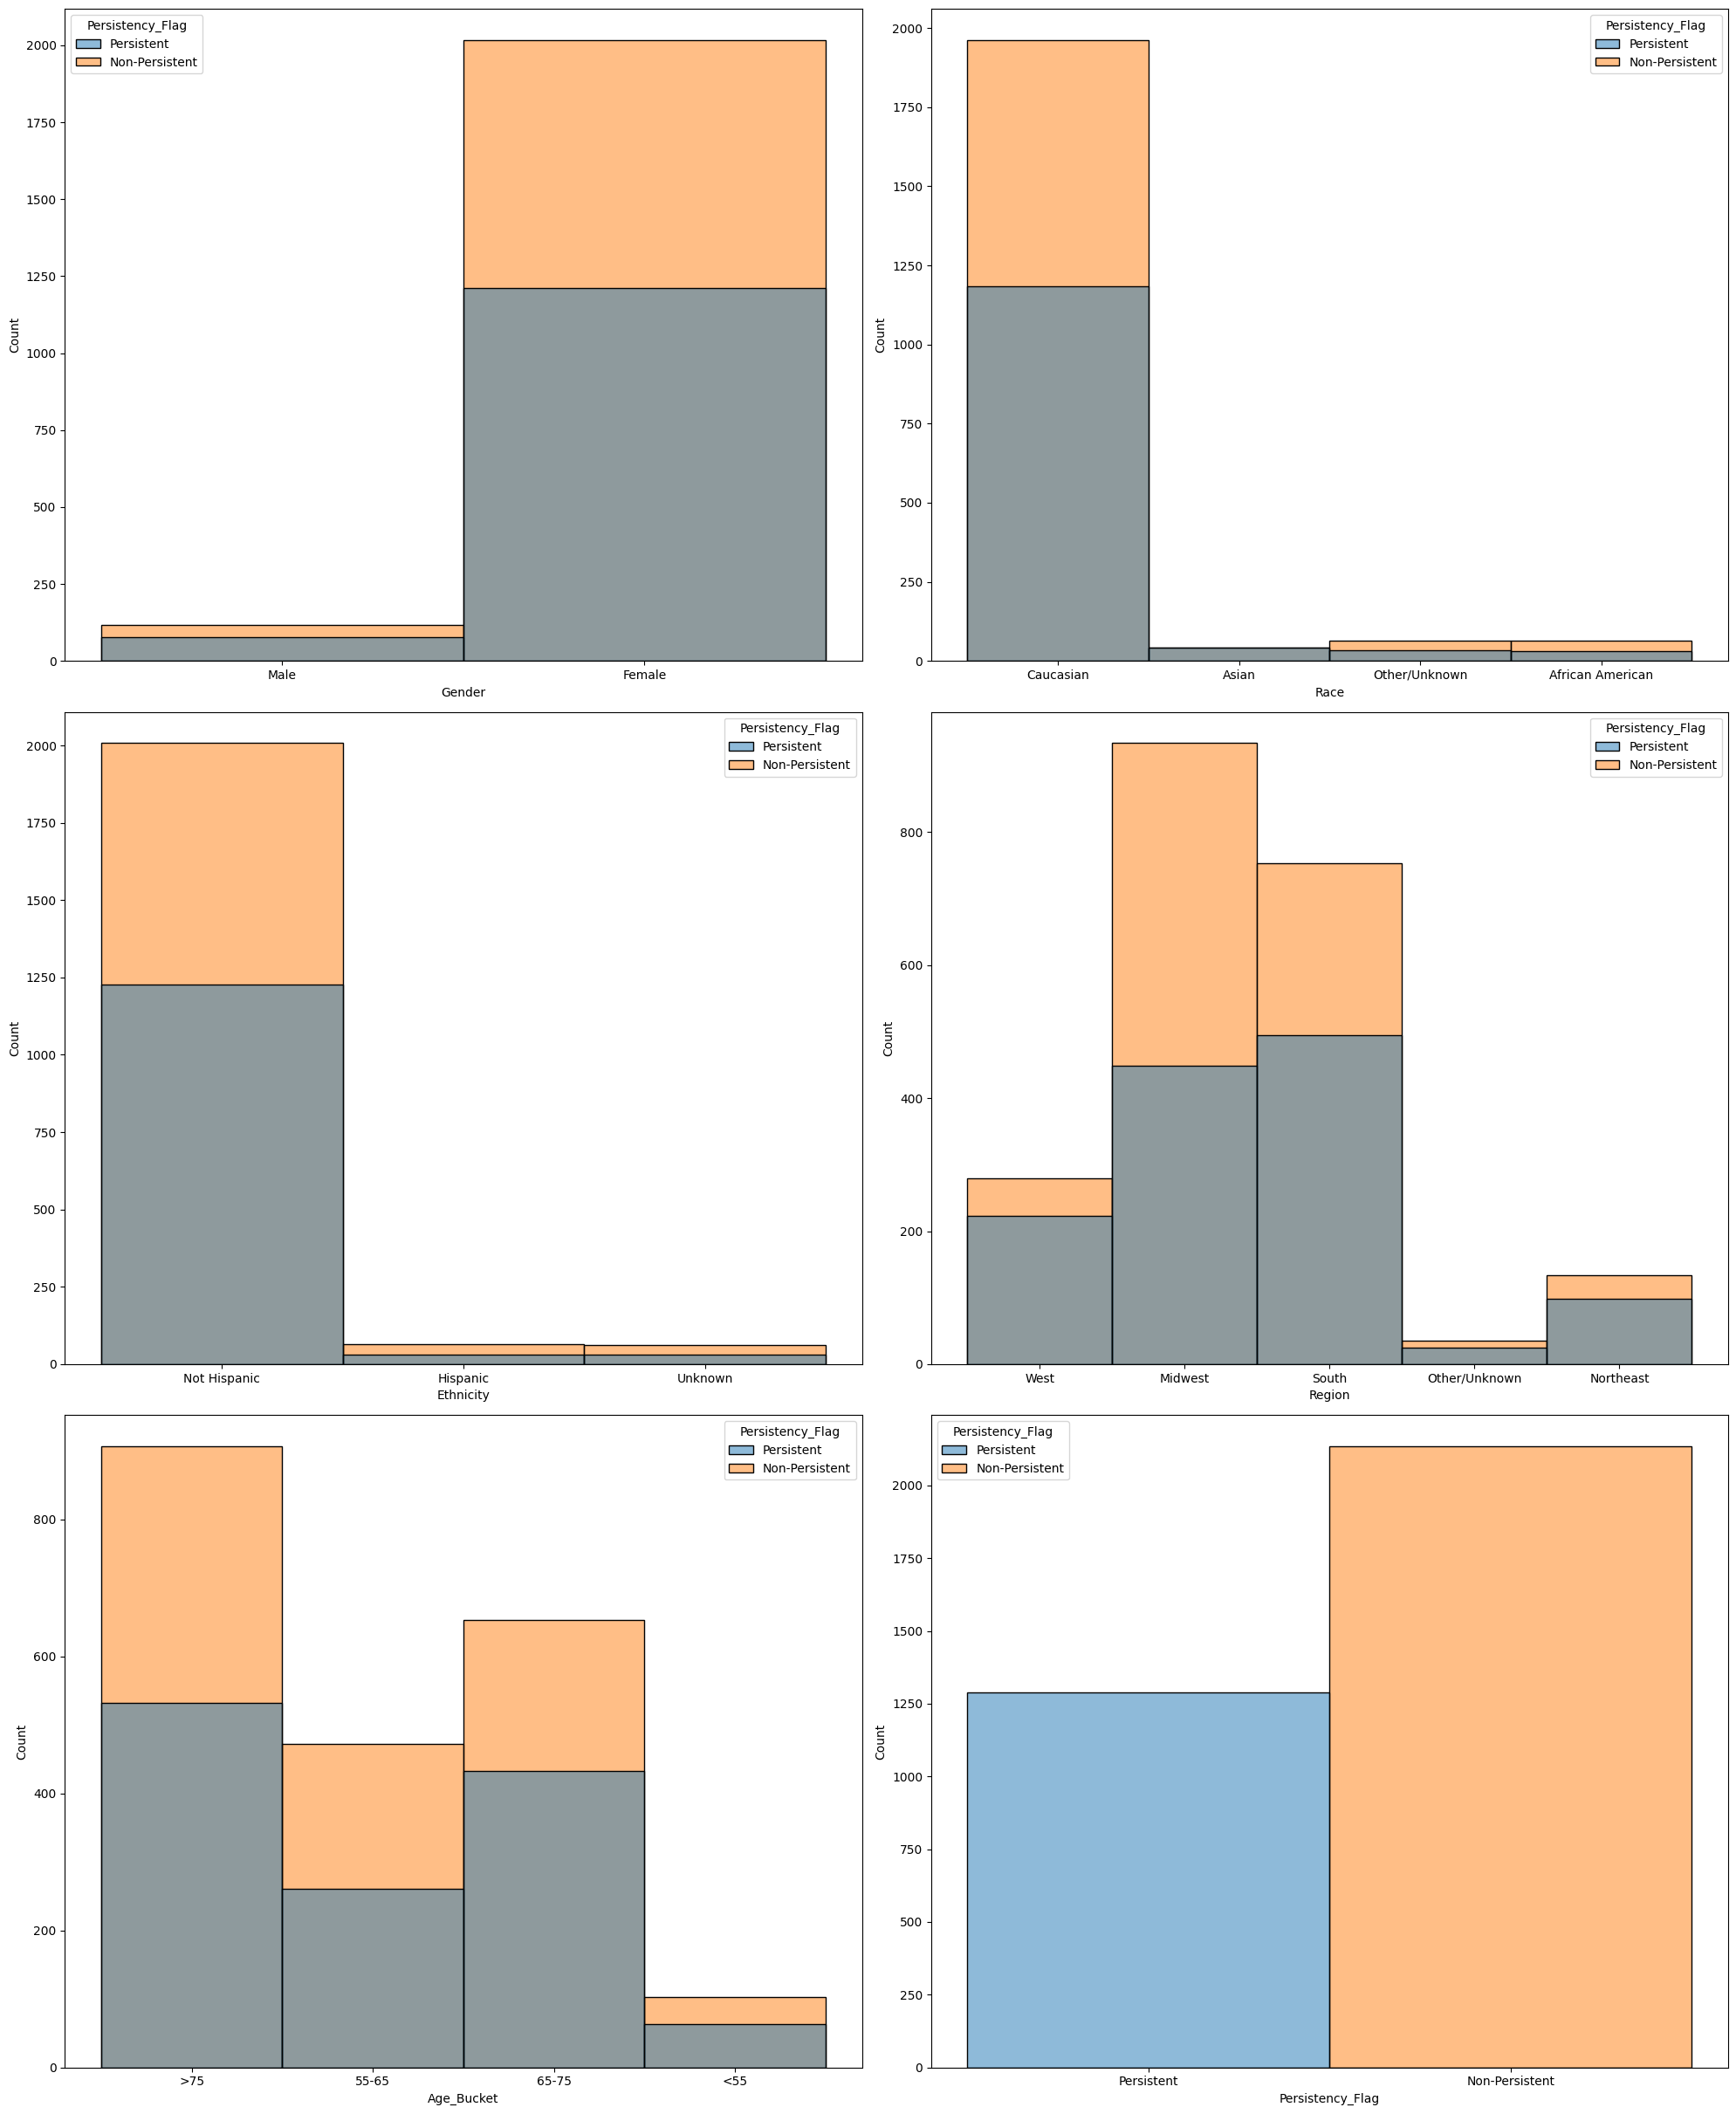

In [ ]:
#cat_var=demo_data.select_dtypes('object')
plt.figure(figsize=(20,40))
platenum=1
for i in demo_data:
    if platenum<=10:
        plt.subplot(5,2,platenum)
        sns.histplot(data=demo_data, x=i,hue='Persistency_Flag')
    platenum+=1
plt.tight_layout()
plt.show()

In [ ]:
demo_data.describe()

,Gender,Race,Ethnicity,Region,Age_Bucket,Persistency_Flag
count,3424,3424,3424,3424,3424,3424
unique,2,4,3,5,4,2
top,Female,Caucasian,Not Hispanic,Midwest,>75,Non-Persistent
freq,3230,3148,3235,1383,1439,2135


In [ ]:
demo_data.isnull().sum()

Gender              0
Race                0
Ethnicity           0
Region              0
Age_Bucket          0
Persistency_Flag    0
dtype: int64

In [ ]:
# Define mappings from categories to numerical values
gender_mapping = {'Male': 2, 'Female': 1}
race_mapping = {'Caucasian': 4, 'Asian': 1, 'Other/Unknown': 2, 'African American': 3}
ethnicity_mapping = {'Not Hispanic': 3, 'Hispanic': 1, 'Unknown': 2}
region_mapping = {'West': 5, 'Midwest': 1, 'South': 2, 'Other/Unknown': 3, 'Northeast': 4}
age_mapping = {'>75': 0, '55-65': 1, '65-75': 2, '<55': 3}
persistence_mapping = {'Persistent': 1, 'Non-Persistent': 0}

# Map categorical variables to numerical values using the defined mappings
demo_data['Gender'] = demo_data['Gender'].map(gender_mapping)
demo_data['Race'] = demo_data['Race'].map(race_mapping)
demo_data['Ethnicity'] = demo_data['Ethnicity'].map(ethnicity_mapping)
demo_data['Region'] = demo_data['Region'].map(region_mapping)
demo_data['Age_Bucket'] = demo_data['Age_Bucket'].map(age_mapping)
demo_data['Persistency_Flag'] = demo_data['Persistency_Flag'].map(persistence_mapping)

In [ ]:
demo_data.Persistency_Flag.unique()

array([1, 0])

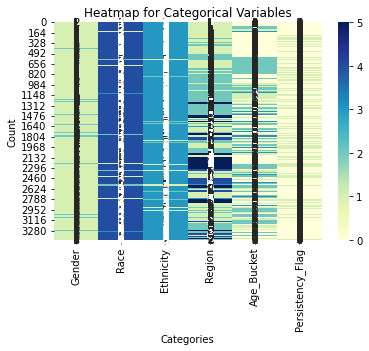

In [ ]:
sns.heatmap(demo_data, annot=True, cmap="YlGnBu")  # Adjust colormap as desired
plt.title('Heatmap for Categorical Variables')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

#### Lets look at the Risk factors

ValueError: Could not interpret value `Persistency_Flag` for `hue`. An entry with this name does not appear in `data`.

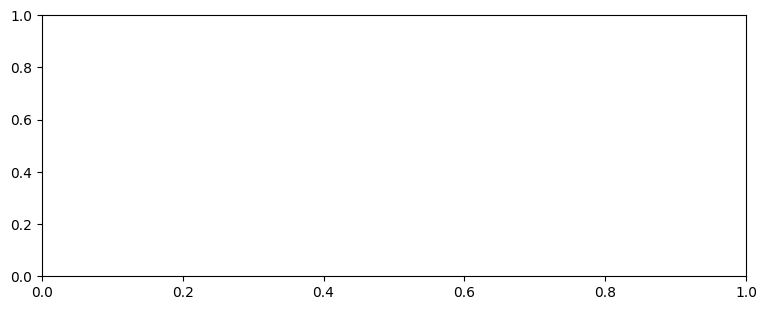

In [ ]:
cat_var_risk=risk_factors.select_dtypes('object')
plt.figure(figsize=(20,40))
platenum=1
for i in cat_var_risk:
    if platenum<=20:
        plt.subplot(10,2,platenum)
        sns.histplot(data=cat_var_risk, x=i, hue= 'Persistency_Flag')
    platenum+=1
plt.tight_layout()
plt.show()

In [ ]:
risk_factors.describe()

In [ ]:
risk_factors.isnull().sum()

In [ ]:
for i in risk_factors:
    print(risk_factors[i].unique(),risk_factors[i].value_counts())
    print('..........................................................')

In [ ]:
# Define the mapping for the risk factors
gen_mapping = {'N': 1, 'Y': 2}

# Iterate over the risk factor columns
for column in risk_factors.columns:
    # Check if the unique values in the column are 'N'
    if (risk_factors[column] == 'N').all():
        # If all values are 'N', map 'N' to 1
        risk_factors[column] = risk_factors[column].map(gen_mapping)
    else:
        # Otherwise, map 'Y' to 2
        risk_factors[column] = risk_factors[column].map(gen_mapping)

In [ ]:
for i in risk_factors:
    print(risk_factors[i].unique(),risk_factors[i].value_counts())
    print('..........................................................')

[1 2] Risk_Type_1_Insulin_Dependent_Diabetes
1    3285
2     139
Name: count, dtype: int64
..........................................................
[1 2] Risk_Osteogenesis_Imperfecta
1    3421
2       3
Name: count, dtype: int64
..........................................................
[1 2] Risk_Rheumatoid_Arthritis
1    3294
2     130
Name: count, dtype: int64
..........................................................
[1 2] Risk_Untreated_Chronic_Hyperthyroidism
1    3422
2       2
Name: count, dtype: int64
..........................................................
[1 2] Risk_Untreated_Chronic_Hypogonadism
1    3297
2     127
Name: count, dtype: int64
..........................................................
[1 2] Risk_Untreated_Early_Menopause
1    3412
2      12
Name: count, dtype: int64
..........................................................
[1 2] Risk_Patient_Parent_Fractured_Their_Hip
1    3168
2     256
Name: count, dtype: int64
..........................................

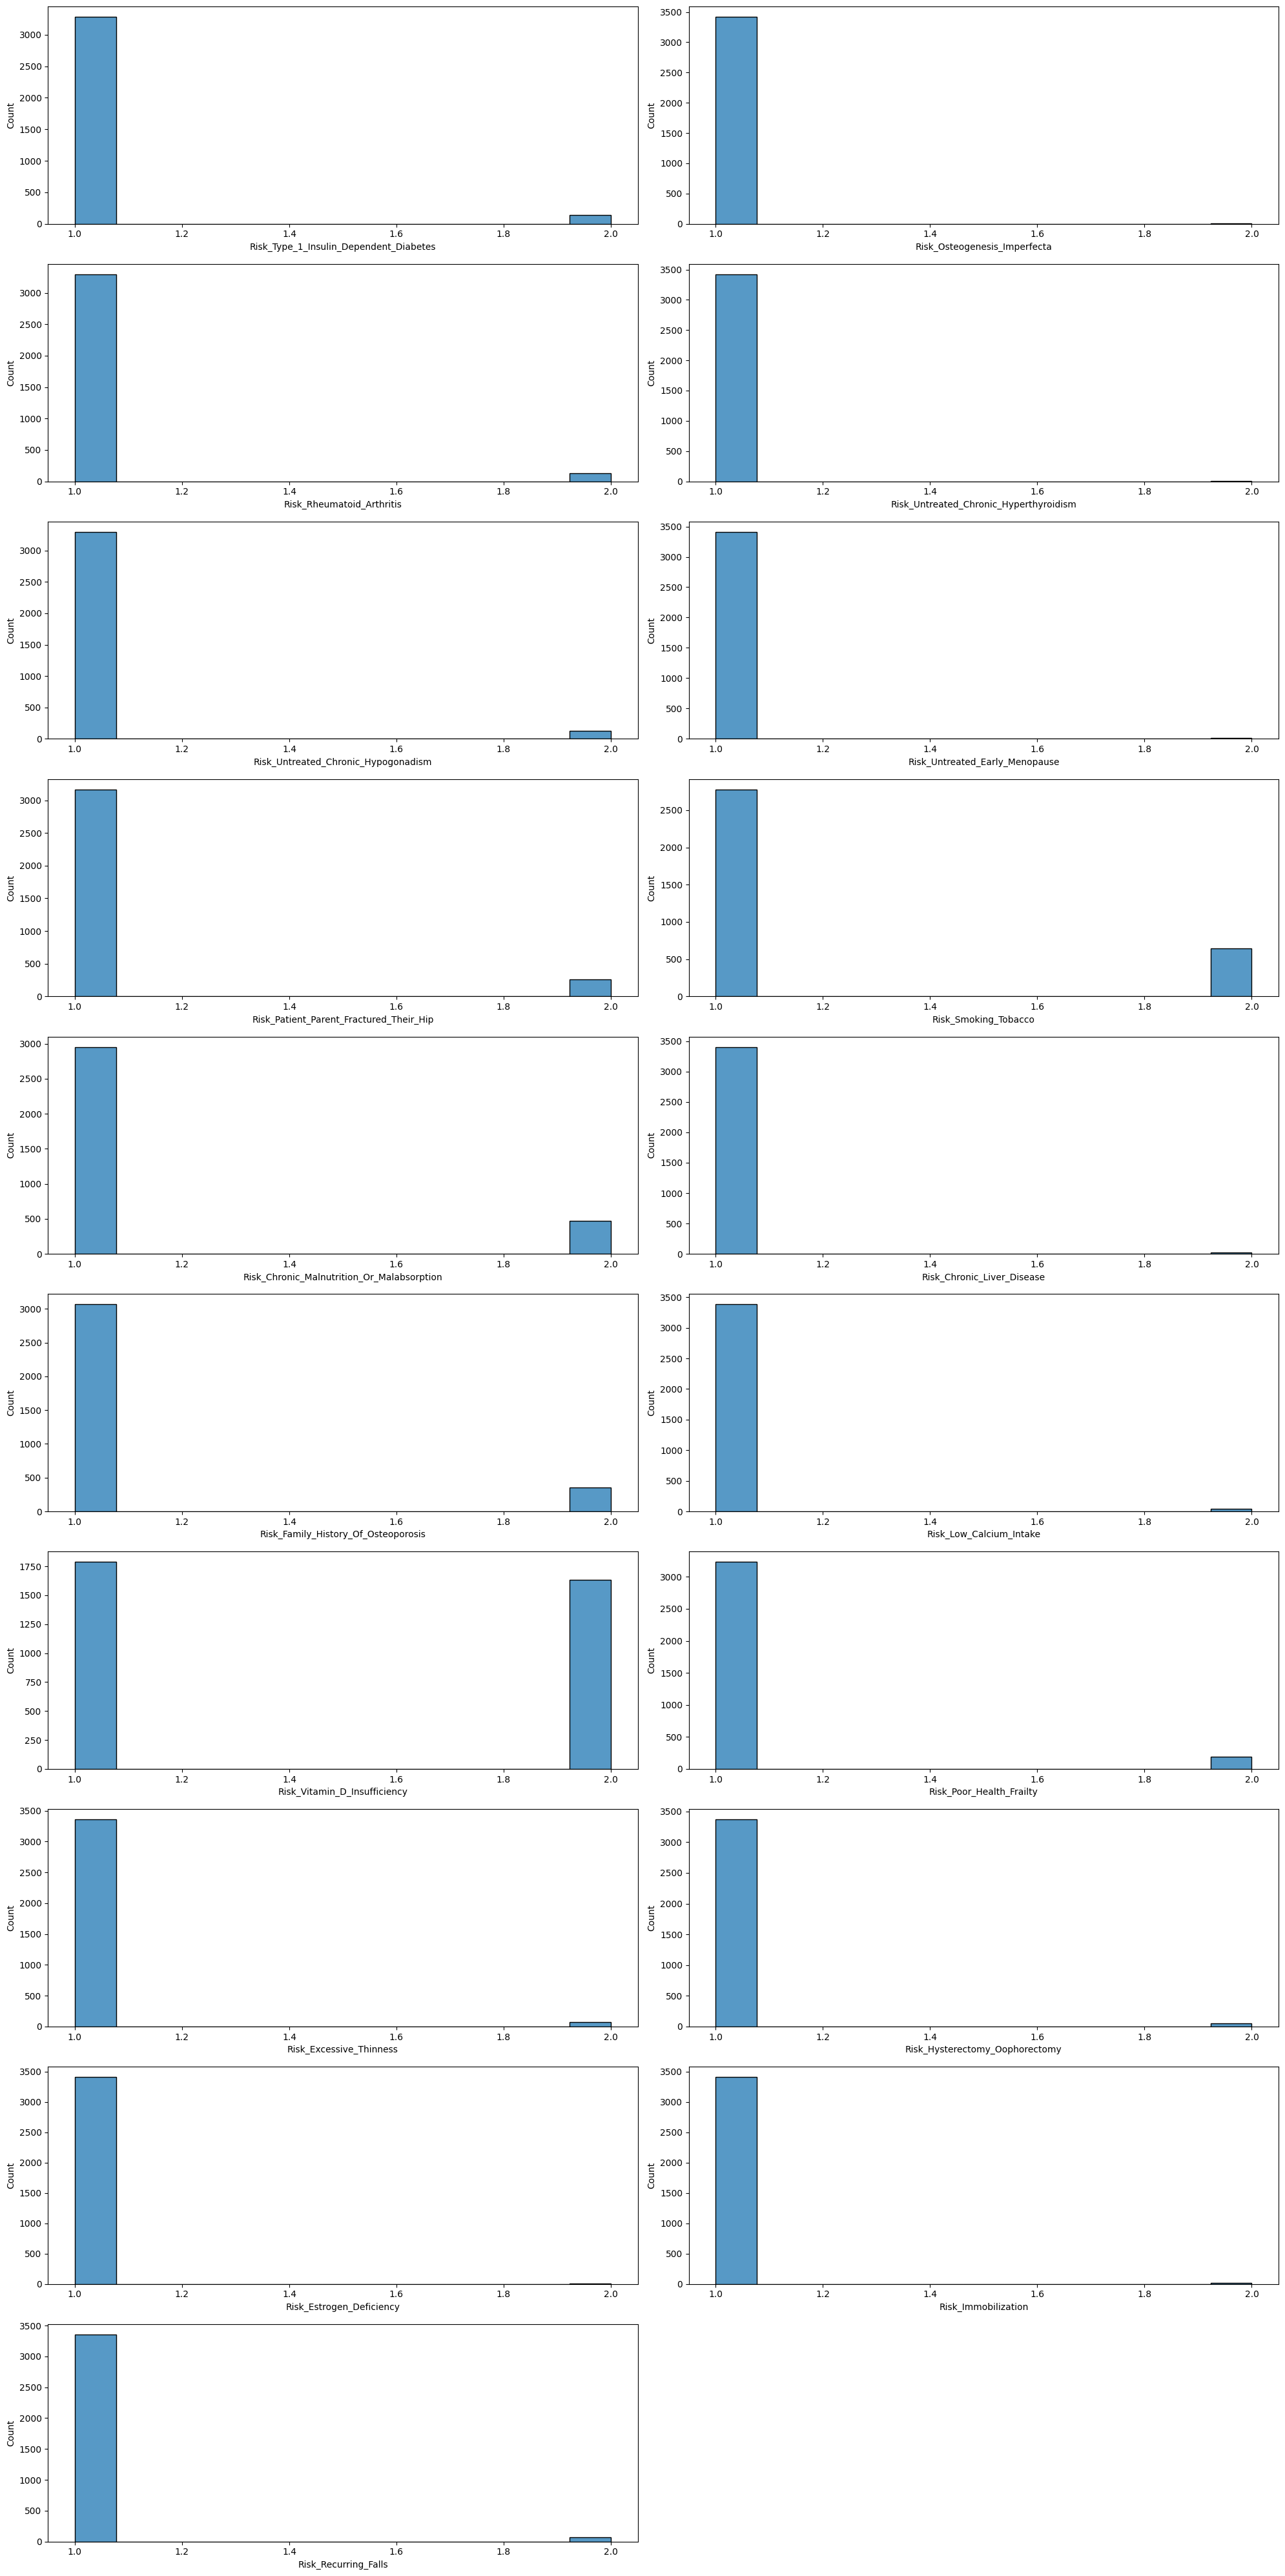

In [ ]:
num_var_risk=risk_factors.select_dtypes('int64')
plt.figure(figsize=(20,40))
platenum=1
for i in num_var_risk:
    if platenum<=20:
        plt.subplot(10,2,platenum)
        sns.histplot(data=num_var_risk, x=i)
    platenum+=1
plt.tight_layout()
plt.show()

In [ ]:
comobidities.isnull().sum()

In [ ]:
comobidities.describe()

In [ ]:
comobidities.drop('Persistency_Flag', axis=1, inplace=True)
for i in comobidities:
    print(comobidities[i].unique(),comobidities[i].value_counts())
    print('..........................................................')

In [ ]:
# Define the mapping for the comobidities
gen_mapping = {'N': 1, 'Y': 2}

# Iterate over the comobidities columns
for column in comobidities.columns:
    # Check if the unique values in the column are 'N'
    if (comobidities[column] == 'N').all():
        # If all values are 'N', map 'N' to 1
        comobidities[column] = comobidities[column].map(gen_mapping)
    else:
        # Otherwise, map 'Y' to 2
        comobidities[column] = comobidities[column].map(gen_mapping)

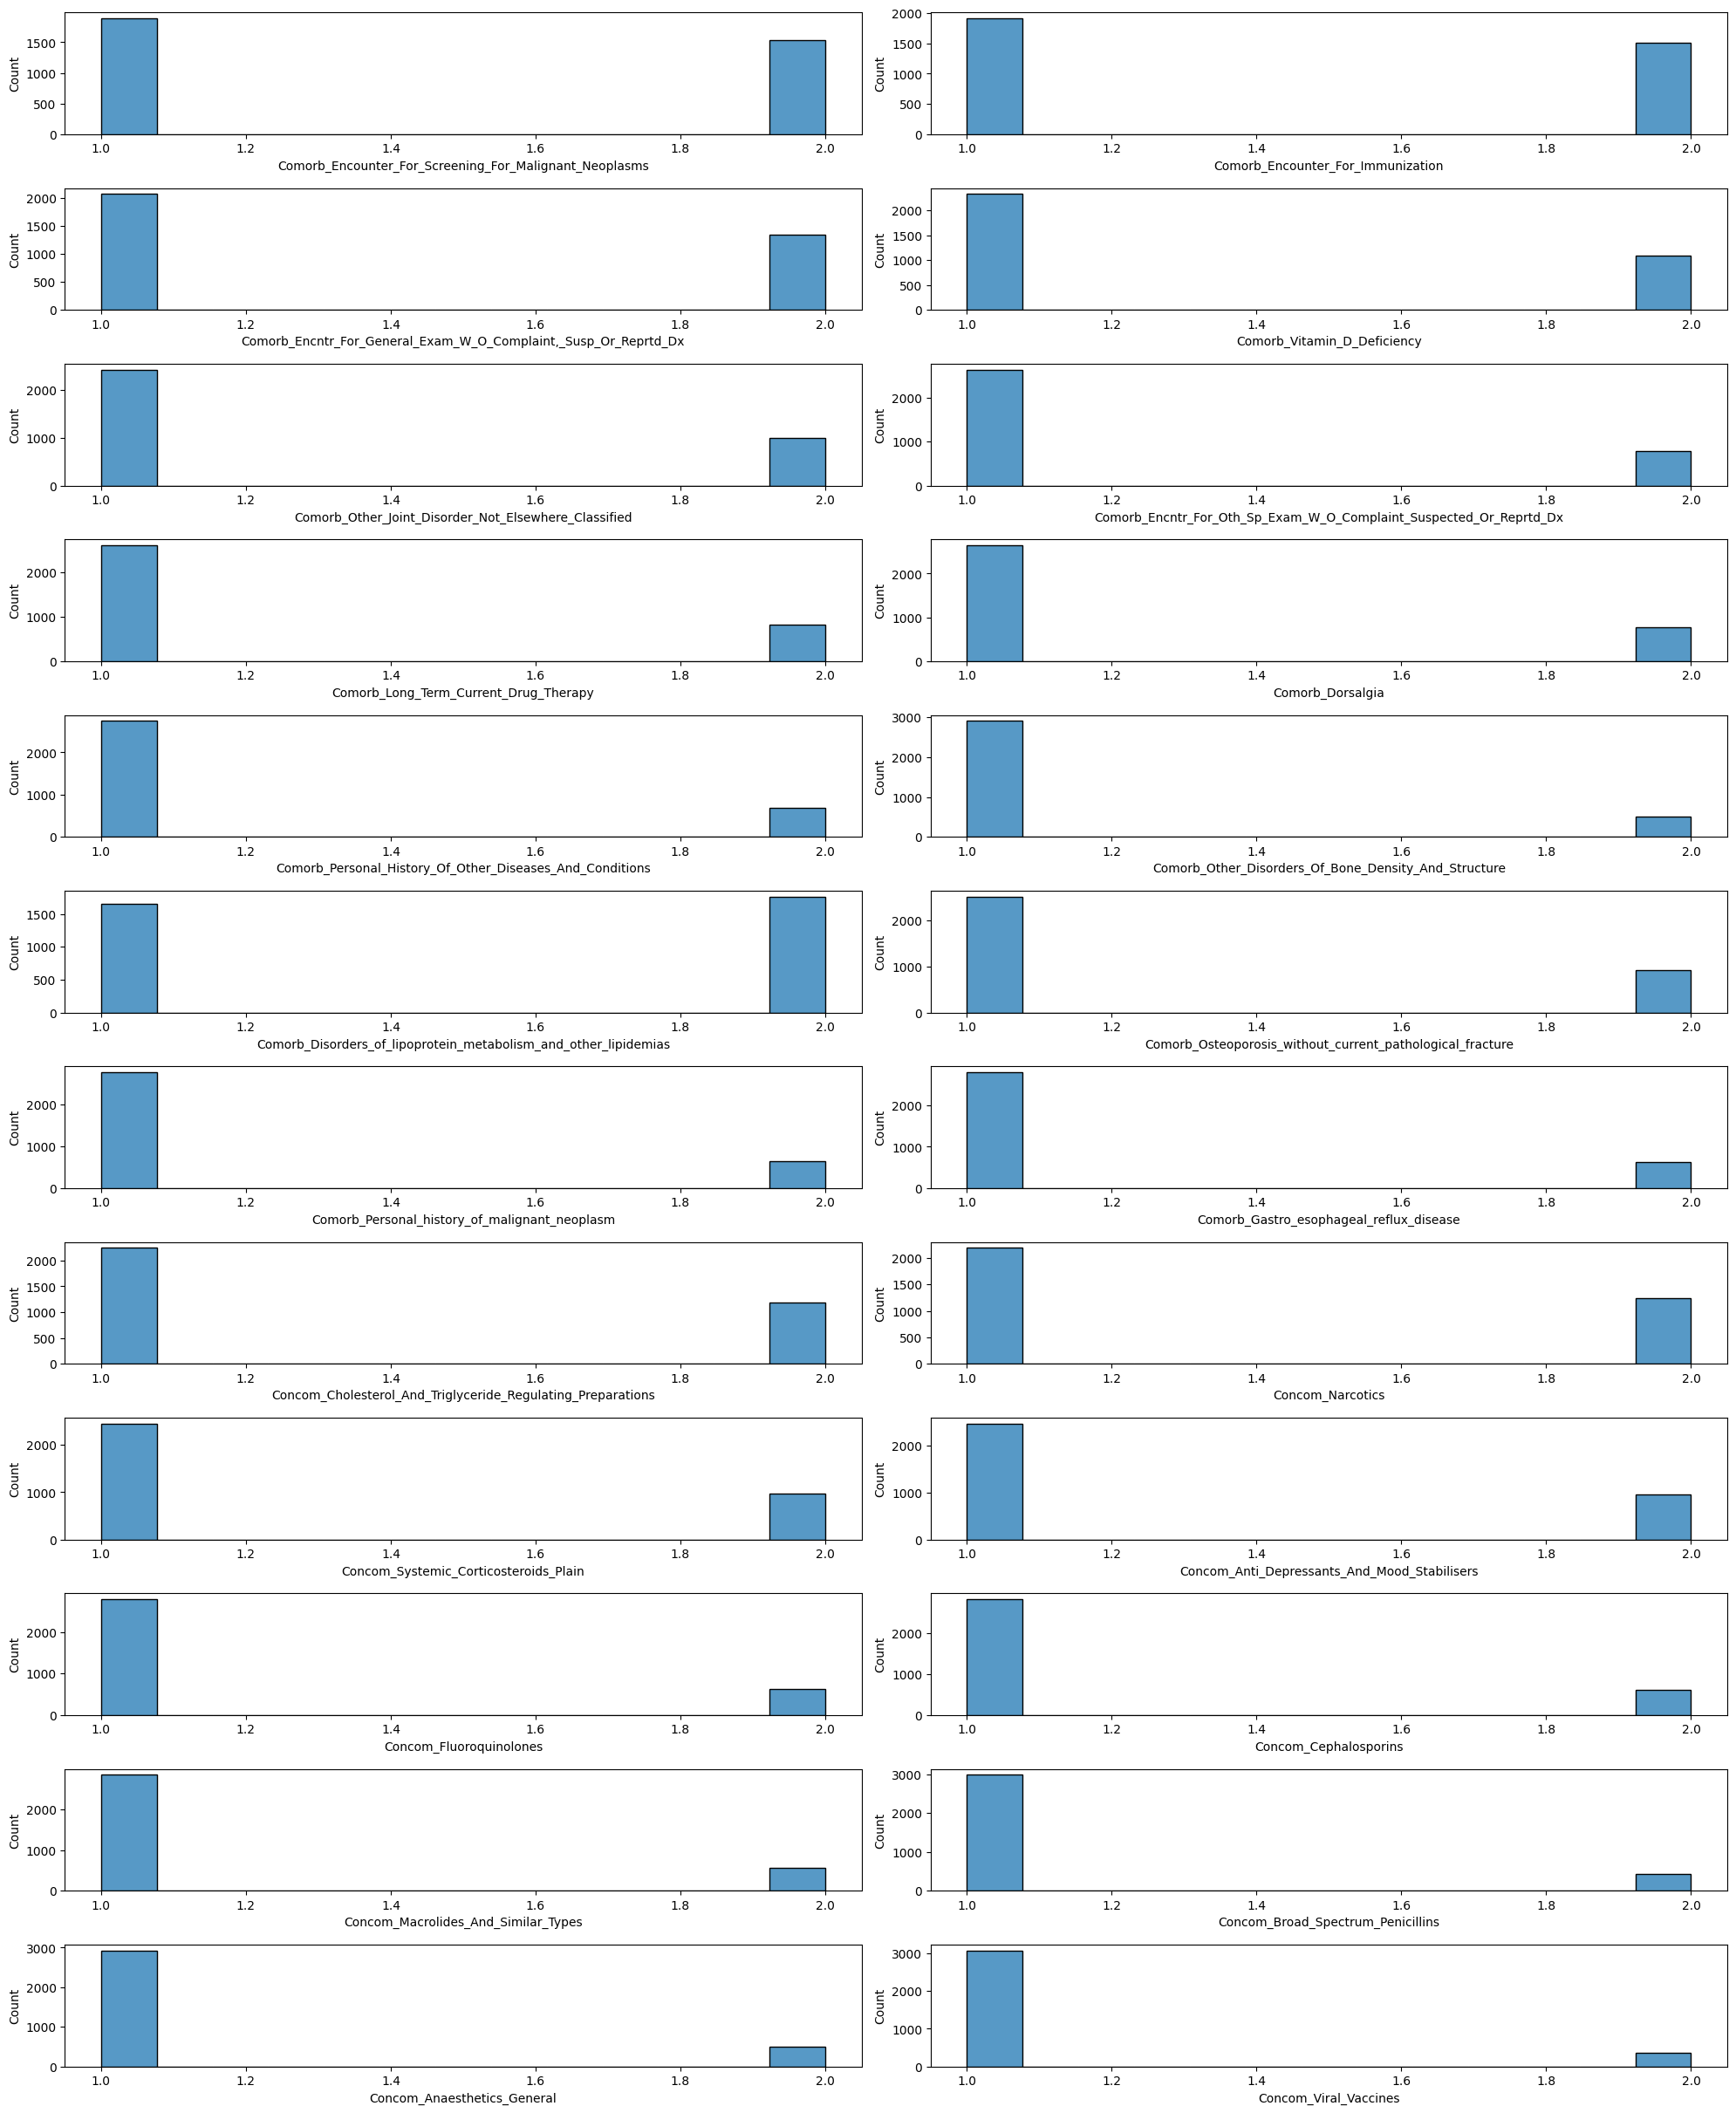

In [ ]:
num_var_com=comobidities.select_dtypes('int64')
plt.figure(figsize=(20,40))
platenum=1
for i in num_var_com:
    if platenum<=40:
        plt.subplot(20,2,platenum)
        sns.histplot(data=num_var_com, x=i)
    platenum+=1
plt.tight_layout()
plt.show()

In [ ]:
#speciality.drop('Persistency_Flag', axis=1, inplace=True)
for i in num_var_risk:
    print(num_var_risk[i].unique(),num_var_risk[i].value_counts())
    print('..........................................................')

In [ ]:
speciality.describe()

In [ ]:
speciality.isnull().sum()

In [ ]:
speciality.drop('Persistency_Flag', axis=1, inplace=True)
for i in speciality:
    print(speciality[i].unique(),speciality[i].value_counts())
    print('..........................................................')

In [ ]:
speciality.describe()

In [ ]:
# Define mappings from categories to numerical values
# Lets impute every class with less than 90 observations in to one class '8'
Ntm_Speciality_mapping = {'GENERAL PRACTITIONER':1,'Unknown':2,'ENDOCRINOLOGY':3,'RHEUMATOLOGY':4,
 'ONCOLOGY':5, 'PATHOLOGY':8, 'OBSTETRICS AND GYNECOLOGY':6,
 'PSYCHIATRY AND NEUROLOGY':8, 'ORTHOPEDIC SURGERY':8,
 'PHYSICAL MEDICINE AND REHABILITATION':8, 'SURGERY AND SURGICAL SPECIALTIES':8,
 'PEDIATRICS':8, 'PULMONARY MEDICINE':8, 'HEMATOLOGY & ONCOLOGY':8, 'UROLOGY':8,
 'PAIN MEDICINE':8, 'NEUROLOGY':8, 'RADIOLOGY':8, 'GASTROENTEROLOGY':8,
 'EMERGENCY MEDICINE':8, 'PODIATRY':8,'OPHTHALMOLOGY':8, 'OCCUPATIONAL MEDICINE':8,
 'TRANSPLANT SURGERY':8, 'PLASTIC SURGERY':8,'CLINICAL NURSE SPECIALIST':8,
 'OTOLARYNGOLOGY':8, 'HOSPITAL MEDICINE':8, 'ORTHOPEDICS':8, 'NEPHROLOGY':8,
 'GERIATRIC MEDICINE':8, 'HOSPICE AND PALLIATIVE MEDICINE':8,
 'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY':8,
 'VASCULAR SURGERY':8, 'CARDIOLOGY':8, 'NUCLEAR MEDICINE':8}
Ntm_Specialist_Flag_map = {'Others':1 ,'Specialist':2}
Ntm_Speciality_Bucket_map = {'OB/GYN/Others/PCP/Unknown':1, 'Endo/Onc/Uro':2, 'Rheum':3}
Gluco_Record_Prior_Ntm_map = {'N':1,'Y':2}
Gluco_Record_During_Rx_map = {'N':1,'Y':2}
Dexa_During_Rx_map = {'N':1,'Y':2}
Frag_Frac_Prior_Ntm_map={'N':1,'Y':2}
Frag_Frac_During_Rx_map={'N':1,'Y':2}
Risk_Segment_Prior_Ntm_map = {'VLR_LR':1,'HR_VHR':2}
Tscore_Bucket_Prior_Ntm_map = {'<=-2.5':2,'Unknown':1, '>-2.5':3}
Risk_Segment_During_Rx_map={'VLR_LR':2,'Unknown':1,'HR_VHR':3}
Tscore_Bucket_During_Rx_map = {'<=-2.5':2,'Unknown':1, '>-2.5':3}
Change_T_Score_map={'No change':2,'Unknown':1,'Worsened':3,'Improved':4}
Change_Risk_Segment_map={'No change':2,'Unknown':1,'Worsened':3,'Improved':4}


# Map categorical variables to numerical values using the defined mappings
speciality['Ntm_Speciality'] = speciality['Ntm_Speciality'].map(Ntm_Speciality_mapping)
speciality['Ntm_Specialist_Flag'] = speciality['Ntm_Specialist_Flag'].map(Ntm_Specialist_Flag_map)
speciality['Ntm_Speciality_Bucket'] = speciality['Ntm_Speciality_Bucket'].map(Ntm_Speciality_Bucket_map)
speciality['Gluco_Record_Prior_Ntm'] = speciality['Gluco_Record_Prior_Ntm'].map(Gluco_Record_Prior_Ntm_map)
speciality['Gluco_Record_During_Rx'] = speciality['Gluco_Record_During_Rx'].map(Gluco_Record_During_Rx_map)
speciality['Dexa_During_Rx'] = speciality['Dexa_During_Rx'].map(Dexa_During_Rx_map)
speciality['Frag_Frac_Prior_Ntm'] = speciality['Frag_Frac_Prior_Ntm'].map(Frag_Frac_Prior_Ntm_map)
speciality['Frag_Frac_During_Rx'] = speciality['Frag_Frac_During_Rx'].map(Frag_Frac_During_Rx_map)
speciality['Risk_Segment_Prior_Ntm'] = speciality['Risk_Segment_Prior_Ntm'].map(Risk_Segment_Prior_Ntm_map)
speciality['Tscore_Bucket_Prior_Ntm'] = speciality['Tscore_Bucket_Prior_Ntm'].map(Tscore_Bucket_Prior_Ntm_map)
speciality['Risk_Segment_During_Rx'] = speciality['Risk_Segment_During_Rx'].map(Risk_Segment_During_Rx_map)
speciality['Tscore_Bucket_During_Rx'] = speciality['Tscore_Bucket_During_Rx'].map(Tscore_Bucket_During_Rx_map)
speciality['Change_T_Score'] = speciality['Change_T_Score'].map(Change_T_Score_map)
speciality['Change_Risk_Segment'] = speciality['Change_Risk_Segment'].map(Change_Risk_Segment_map)

In [ ]:
speciality.isnull().sum()

In [ ]:
#speciality.drop('Persistency_Flag', axis=1, inplace=True)
for i in speciality:
    print(speciality[i].unique(),speciality[i].value_counts())
    print('..........................................................')

In [ ]:
num_var_spe=speciality.select_dtypes('int64')
plt.figure(figsize=(20,40))
platenum=1
for i in num_var_spe:
    if platenum<=40:
        plt.subplot(20,2,platenum)
        sns.histplot(data=num_var_spe, x=i)
    platenum+=1
plt.tight_layout()
plt.show()

In [ ]:
sns.histplot(data=speciality,x=speciality.Dexa_Freq_During_Rx)

In [ ]:
sns.boxplot(data=speciality)

In [ ]:
num_var_com.info()

In [ ]:
data2=pd.concat([num_var_com,num_var_spe,demo_data,num_var_risk],axis=1)

In [ ]:
data2.info()

## Model fitting without class balancing

In [ ]:
pip install sklearn-learn

In [ ]:
pip install --upgrade imbalanced-learn

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


# Splitting dataset into features and labels
X = data2.drop('Persistency_Flag', axis=1) # Assuming 'target_column' is the column you want to predict
y = data2['Persistency_Flag']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but recommended for some algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred))

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

# XGBoost
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_pred = xgb_classifier.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))


## Lets work on class imbalance

In [ ]:
pip install imblearn

In [ ]:
pip install --upgrade imbalanced-learn

In [ ]:
import numpy as np
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTENC

In [ ]:
data_smote=data2.copy()

In [ ]:
# Splitting dataset into features and labels
X_s = data_smote.drop('Persistency_Flag', axis=1) # Assuming 'target_column' is the column you want to predict
y_s = data_smote['Persistency_Flag']


In [ ]:
# Check class imbalance
class_counts = Counter(y_s)
print("Class Distribution:")
print(class_counts)

In [ ]:
# Check for imbalanced data
class_counts = Counter(y_s)
majority_class = class_counts.most_common(1)[0][0]
print("Majority Class:", majority_class)
print("Class Distribution:", class_counts)

In [ ]:
data_smote.columns

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_s, y_s)

In [ ]:
new_class_counts = Counter(y_resampled)
print(f"New class distribution: {new_class_counts}")

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to calculate and print feature importance for tree-based models
def print_feature_importance(model, features):
  if hasattr(model, "feature_importances_"):
      feature_importances = model.feature_importances_
      sorted_idx = feature_importances.argsort()[::-1]
      print("Feature Importance:")
      for f, idx in enumerate(sorted_idx):
          print("%s: %.4f" % (features[idx], feature_importances[idx]))

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, log_reg_pred))

# Random Forest (with feature importance)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print_feature_importance(rf_classifier, list(X_resampled.columns))  # Assuming feature names are in X_resampled.columns

# Decision Tree (with feature importance)
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_pred))
print_feature_importance(dt_classifier, list(X_resampled.columns))  # Assuming feature names are in X_resampled.columns

# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))

# XGBoost
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_pred = xgb_classifier.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, xgb_pred))


NameError: name 'X_resampled' is not defined

In [ ]:
from collections import defaultdict
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

def evaluate_model(X_train, X_test, y_train, y_test, rlf, k_range, random_state_range):
    """
    Evaluates a classifier with different k neighbors and random state values for SMOTE.

    Args:
        X_train (np.ndarray): Training features.
        X_test (np.ndarray): Testing features.
        y_train (np.ndarray): Training labels.
        y_test (np.ndarray): Testing labels.
        rlf: An sklearn classification model object.
        k_range (list): List of k values to try for k nearest neighbors in SMOTE.
        random_state_range (list): List of random state values to try for SMOTE.

    Returns:
        dict: Dictionary containing best accuracy, best parameters (k and random_state),
              and corresponding predictions.
    """
    best_accuracy = -1
    best_params = None
    best_predictions = None

    for k in k_range:
        for random_state in random_state_range:
            # Create SMOTE instance with specific k and random state
            smote = SMOTE(k_neighbors=k, random_state=random_state)

            # Oversample data using SMOTE
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

            # Split resampled data into train/test sets for model evaluation
            X_train_inner, X_val, y_train_inner, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2)

            # Grid search for hyperparameter tuning (optional)
            # You can replace this with your specific hyperparameter tuning strategy
            param_grid = {'n_estimators': [100, 200, 300]}  # Example hyperparameter grid for RandomForestClassifier
            grid_search = GridSearchCV(rlf, param_grid, scoring='accuracy')
            grid_search.fit(X_train_inner, y_train_inner)
            model = grid_search.best_estimator_

            # Train model on inner training set (optional, can use full resampled data)
            model.fit(X_train_inner, y_train_inner)

            # Evaluate model on validation set
            y_pred = model.predict(X_val)
            accuracy = accuracy_score(y_val, y_pred)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'k': k, 'random_state': random_state}
                best_predictions = model.predict(X_test)

    return {'best_accuracy': best_accuracy, 'best_params': best_params, 'predictions': best_predictions}

# Splitting dataset into features and labels
X = data_smote.drop('Persistency_Flag', axis=1) # Assuming 'target_column' is the column you want to predict
y = data_smote['Persistency_Flag']

# Define k and random state ranges to explore
k_range = [3, 5, 7, 10]  # Example k values for SMOTE
random_state_range = [42, 60, 100, 200]  # Example random states for SMOTE

# Choose your classification model (replace with your desired model)
rlf = RandomForestClassifier()
# Perform evaluation with different parameters
results = evaluate_model(X_train, X_test, y_train, y_test, rlf, k_range, random_state_range)

# Print results
print("Best Accuracy:", results['best_accuracy'])
print("Best Parameters:", results['best_params'])


## Random forest

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting dataset into features and labels
X_s = data_smote.drop('Persistency_Flag', axis=1) # Assuming 'target_column' is the column you want to predict
y_s = data_smote['Persistency_Flag']

from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=3, random_state=200)
X_resampled_r, y_resampled_r = smote.fit_resample(X_s, y_s)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_r, y_resampled_r, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Function to calculate and print feature importance for tree-based models
def print_feature_importance(model, features):
    if hasattr(model, "feature_importances_"):
        feature_importances = model.feature_importances_
        sorted_idx = feature_importances.argsort()[::-1]
        print("Feature Importance:")
        for f, idx in enumerate(sorted_idx):
            print("%s: %.4f" % (features[idx], feature_importances[idx]))

# Random Forest
rf_classifier = RandomForestClassifier(max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=200)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print_feature_importance(rf_classifier, list(X_resampled.columns))  # Assuming feature names are in X_resampled.columns

In [ ]:

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.barh(list(X_resampled.columns), rf_classifier.feature_importances_, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


NameError: name 'X_resampled' is not defined

<Figure size 1500x1000 with 0 Axes>

In [ ]:
data_smote.columns

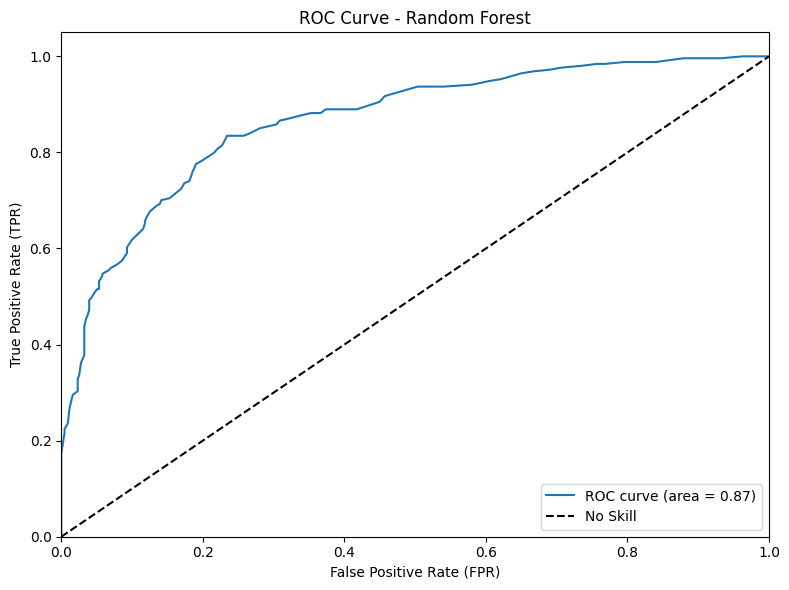

In [ ]:
# ROC AUC curve
from sklearn.metrics import roc_curve, auc

y_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Xgboost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Splitting dataset into features and labels
X_x = data_smote.drop('Persistency_Flag', axis=1) # Assuming 'target_column' is the column you want to predict
y_x = data_smote['Persistency_Flag']

from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5, random_state=200)
X_resampled_x, y_resampled_x = smote.fit_resample(X_x, y_x)

# Splitting the data into training and testing sets
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(X_resampled_x, y_resampled_x, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_x)
X_test = scaler.transform(X_test_x)

# Define a parameter grid
param_grid = {
  'learning_rate': [0.05, 0.1, 0.3],
  'n_estimators': [100, 200, 300],
  'max_depth': [3, 5, 8],
  'min_child_weight': [1, 3, 5]
}

# Create an XGBoost classifier object
xgb_model = XGBClassifier(objective='binary:logistic')

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_x, y_train_x)

# Print the best parameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Access the best model from GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Use the best model for prediction or further evaluation
best_xgb_model.predict(X_test_x)


In [ ]:
# XGBoost
xgb_classifier = XGBClassifier(learning_rate= 0.1, max_depth = 8, min_child_weight= 1, n_estimators=200)
xgb_classifier.fit(X_train_x, y_train_x)
xgb_pred = xgb_classifier.predict(X_test_x)
print("XGBoost Accuracy:", accuracy_score(y_test_x, xgb_pred))
print("XGBoost Classification Report:")
print(classification_report(y_test_x, xgb_pred))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test_x, xgb_pred))

In [ ]:
# ROC AUC curve
y_proba = xgb_classifier.predict_proba(X_test_x)[:, 1]  # Probability of positive class
fpr, tpr, _ = roc_curve(y_test_x, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### Now lets try using the most import features (score => 0.01) to build a model then check accuracy

### Random forest

In [ ]:
good_features=pd.DataFrame(data_smote[['Persistency_Flag','Age_Bucket','Region','Dexa_Freq_During_Rx','Dexa_During_Rx','Ntm_Speciality','Comorb_Long_Term_Current_Drug_Therapy',
                           'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms','Comorb_Encounter_For_Immunization','Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx']])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Splitting dataset into features and labels
X_f = good_features.drop('Persistency_Flag', axis=1) # Assuming 'target_column' is the column you want to predict
y_f = good_features['Persistency_Flag']

from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=3, random_state=200)
X_resampled_f, y_resampled_f = smote.fit_resample(X_f, y_f)

# Splitting the data into training and testing sets
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_resampled_f, y_resampled_f, test_size=0.2, random_state=42)

# Define a parameter grid to explore
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_f, y_train_f)

# Print the best parameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Access the best model from GridSearchCV
best_forest = grid_search.best_estimator_

# Use the best model for prediction or further evaluation
best_forest.predict(X_test_f)


In [ ]:


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_f)
X_test = scaler.transform(X_test_f)
# Function to calculate and print feature importance for tree-based models
def print_feature_importance(model, features):
    if hasattr(model, "feature_importances_"):
        feature_importances = model.feature_importances_
        sorted_idx = feature_importances.argsort()[::-1]
        print("Feature Importance:")
        for f, idx in enumerate(sorted_idx):
            print("%s: %.4f" % (features[idx], feature_importances[idx]))

# Random Forest
rf_classifier = RandomForestClassifier(max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
rf_classifier.fit(X_train_f, y_train_f)
rf_pred_f = rf_classifier.predict(X_test_f)
print("Random Forest Accuracy:", accuracy_score(y_test_f, rf_pred_f))
print("Random Forest Classification Report:")
print(classification_report(y_test_f, rf_pred_f))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test_f, rf_pred_f))
print_feature_importance(rf_classifier, list(X_resampled_f.columns))  # Assuming feature names are in X_resampled.columns

Random Forest Accuracy: 0.8044496487119438
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       418
           1       0.85      0.75      0.80       436

    accuracy                           0.80       854
   macro avg       0.81      0.81      0.80       854
weighted avg       0.81      0.80      0.80       854

Random Forest Confusion Matrix:
[[359  59]
 [108 328]]
Feature Importance:
Dexa_Freq_During_Rx: 0.3349
Dexa_During_Rx: 0.1920
Comorb_Long_Term_Current_Drug_Therapy: 0.0863
Ntm_Speciality: 0.0771
Comorb_Encounter_For_Immunization: 0.0749
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx: 0.0695
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms: 0.0604
Region: 0.0541
Age_Bucket: 0.0509


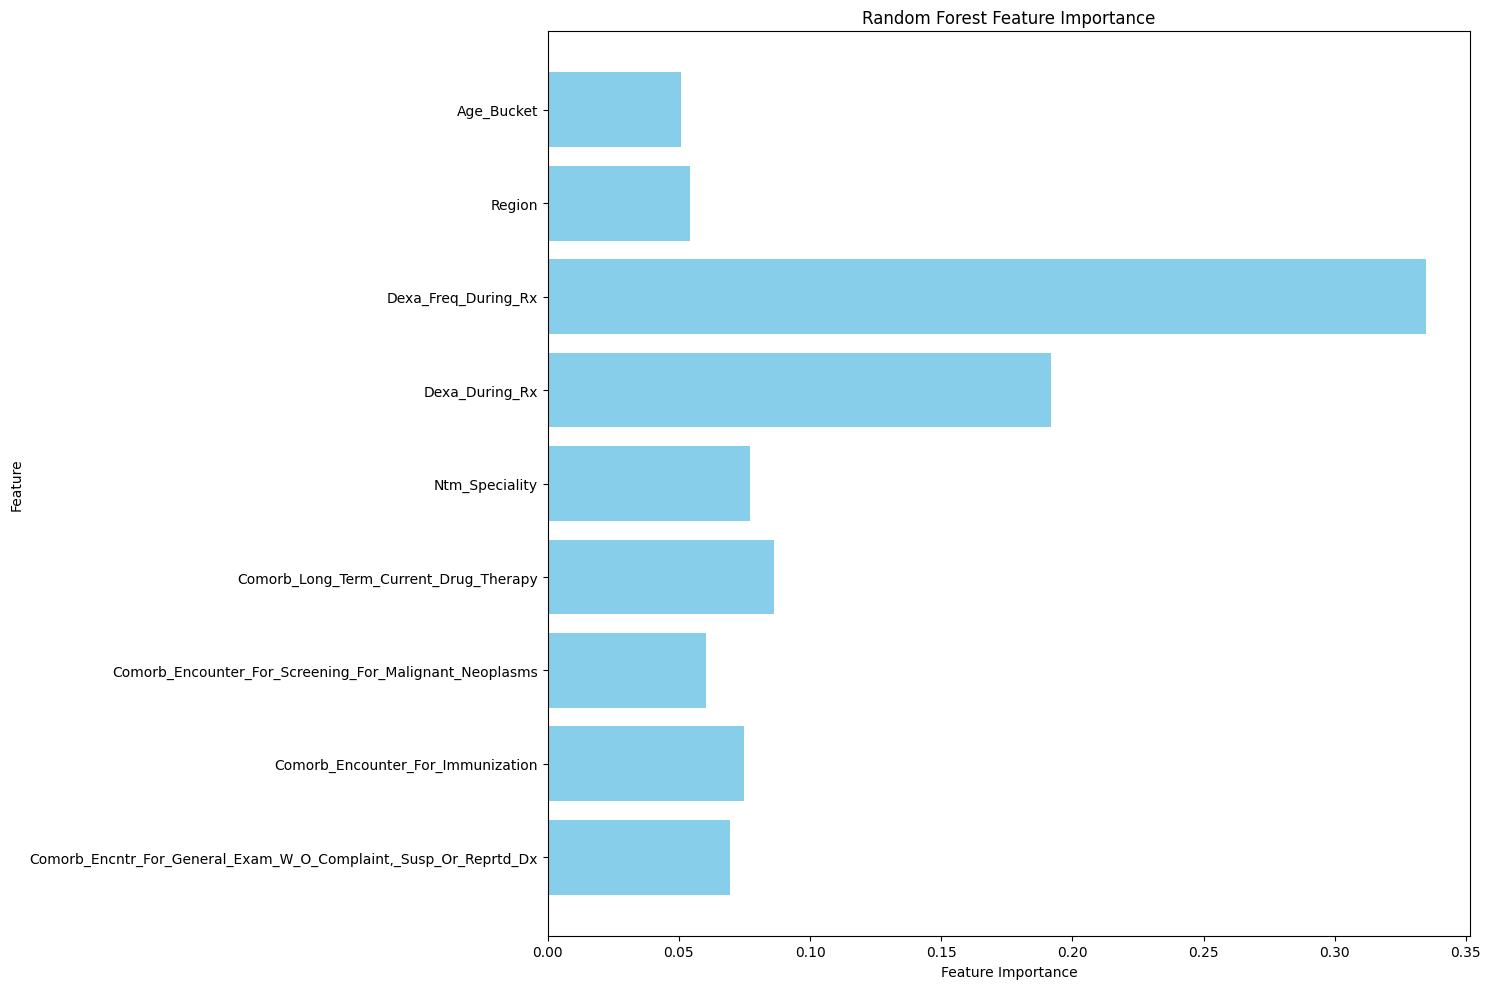

In [ ]:

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.barh(list(X_resampled_f.columns), rf_classifier.feature_importances_, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


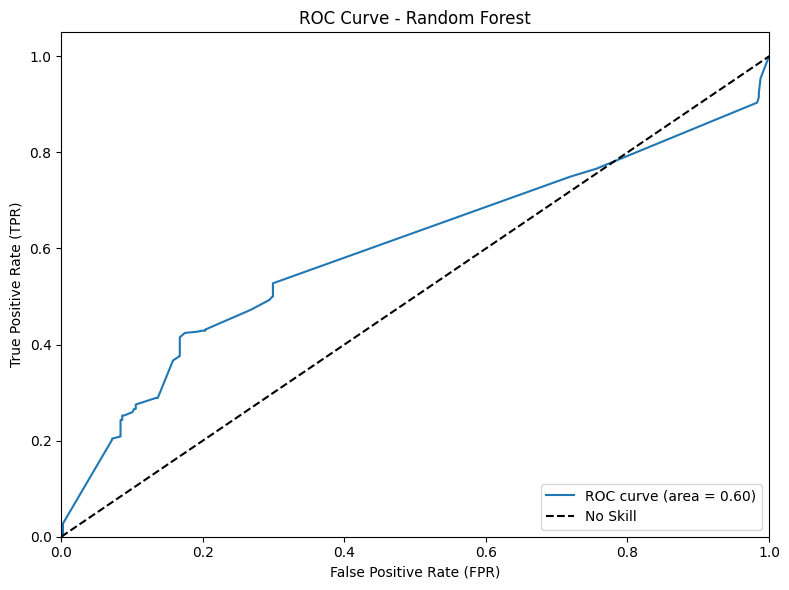

In [ ]:
# ROC AUC curve
y_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### Xgboost on the good features

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Splitting dataset into features and labels
X_xf = good_features.drop('Persistency_Flag', axis=1) # Assuming 'target_column' is the column you want to predict
y_xf = good_features['Persistency_Flag']

from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5, random_state=200)
X_resampled_xf, y_resampled_xf = smote.fit_resample(X_xf, y_xf)

# Splitting the data into training and testing sets
X_train_xf, X_test_xf, y_train_xf, y_test_xf = train_test_split(X_resampled_xf, y_resampled_xf, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_xf)
X_test = scaler.transform(X_test_xf)

# Define a parameter grid
param_grid = {
  'learning_rate': [0.05, 0.1, 0.3],
  'n_estimators': [100, 200, 300],
  'max_depth': [3, 5, 8],
  'min_child_weight': [1, 3, 5]
}

# Create an XGBoost classifier object
xgb_model = XGBClassifier(objective='binary:logistic')

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_xf, y_train_xf)

# Print the best parameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Access the best model from GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Use the best model for prediction or further evaluation
best_xgb_model.predict(X_test_xf)


In [ ]:
# XGBoost
xgb_classifier = XGBClassifier(learning_rate= 0.05, max_depth = 8, min_child_weight= 1, n_estimators=200)
xgb_classifier.fit(X_train_xf, y_train_xf)
xgb_pred_f = xgb_classifier.predict(X_test_xf)
print("XGBoost Accuracy:", accuracy_score(y_test_xf, xgb_pred_f))
print("XGBoost Classification Report:")
print(classification_report(y_test_xf, xgb_pred_f))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test_xf, xgb_pred_f))

In [ ]:
# ROC AUC curve
y_proba = xgb_classifier.predict_proba(X_test_xf)[:, 1]  # Probability of positive class
fpr, tpr, _ = roc_curve(y_test_xf, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()